In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Agenda

* Training NN
* Predicting with NN
* Recurrent NN (RNN)

## Working with MNIST

MNIST(Modified National Institute of Standards and Technology database) is a database of hand-written numbers

In [2]:
import keras.datasets

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0].shape

(28, 28)

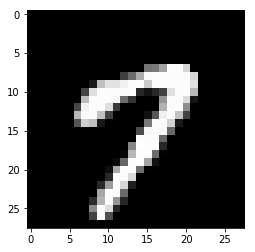

In [13]:
plt.imshow(x_train[15], cmap='gray')

## Working with image data

Images as greyscale values: 0 - 255


In [15]:
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

## Predicting image classes with decision trees

In [3]:
# We have to flatten the data for our classifier
x_train_flat = x_train.reshape(-1, 28 * 28)
x_train_flat.shape

(60000, 784)

In [4]:
x_test_flat = x_test.reshape(-1, 28 * 28)

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train_flat, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(x_test_flat))

KeyboardInterrupt: 

## Predicting image classes with SVMs


In [6]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train_flat[:1000], y_train[:1000])

/home/jens/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
accuracy_score(y_test, model.predict(x_test_flat))

0.1028

## Neural network prediction

![](nn.png)

## Predicting image classes with Keras

In [10]:
from keras import models
from keras import layers

model = models.Sequential([
  layers.Dense(128, activation='relu', input_shape=(784,)),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train_flat, y_train, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 7.8103 - acc: 0.5129
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 6.5185 - acc: 0.5944
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 6.2101 - acc: 0.6138
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 6.2615 - acc: 0.6106
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 6.0225 - acc: 0.6257


In [14]:
model.evaluate(x_test_flat, y_test)

10000/10000 [==============================] - 0s 20us/step


[6.4571653129577635, 0.5986]

## How neural networks are trained

We know we have an activation function $f$:

$$f(x) = {1 \over {1 + e^{-x}}}$$

Where the output ($o_j$) of each neuron in a layer ($l$) is defined as:

$$o(x_j) = \sum^N_{k=1} W_{kj} x_k + \beta$$

The activation function has an easy derivative:

$$f'(x) = ({1 \over {1 + e^{-x}}})' = f(x)(1 - f(x))$$

## What are we optimising?

A loss function!

$$E = {1 \over 2} (y - \hat{y})^2$$

Ergo, we want to know the *gradient* of the loss function, so we can find the minimum!

## Differentiating the loss function

$$E' = ({1 \over 2} (y - \hat{y})^2)' = y - \hat{y}$$

## Which parameters would we like to change in the network?

$W$ and $\beta$!

* Ignore $\beta$ for now

![](bp.png)

## How to differentiate with respect to $W$

We are looking for this:
$$\Delta E = ({\partial E \over \partial w_1}, {\partial E \over \partial w_2}, \dots {\partial E \over \partial w_n})$$

$${\partial E \over \partial w_{jk}} = {\partial ((y_j - \hat{y}_j) o_j) \over \partial w_{jk}}$$

$${\partial E \over \partial w_{jk}} = {\partial E \over \partial o_j} {\partial o_j \over \partial w_{jk}}$$

$${\partial E \over \partial w_{jk}} = \delta_j z_j$$

$$\delta_j = o'(x_j) \sum^N_{k=1} w_{kj} \delta_k$$

![](bp.png)

## Weight updates:

$$\Delta w_j = -\gamma {\partial E \over \partial w_j}$$

## Bias updates:

$$\Delta b_j = -\gamma \delta_j$$

## Backpropagation

* Pushes errors **back** in the network, and adjusts **weights** and **biases**
* Requires deriving the *activation function* and *error function*

![](nn.png)

## Back to prediction...

* We now saw that **gradient descent** is the backbone of neural network training
* What is gradient descent vulnerable to...?

* What is the input domain?

In [15]:
x_train_scaled = x_train_flat / 255
x_test_scaled = x_test_flat / 255

In [16]:
from keras import models
from keras import layers

model = models.Sequential([
  layers.Dense(128, activation='relu', input_shape=(784,)),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2928 - acc: 0.9148
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1438 - acc: 0.9565
Epoch 3/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.1078 - acc: 0.9678
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0897 - acc: 0.9724
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0759 - acc: 0.9762


In [19]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 0s 22us/step


[0.07432961855987087, 0.9769]

## Running Keras / Tensorflow online

* Keras is a layer on top of Tensorflow
* Tensorflow is a library for accelerating tensor computations

https://www.tensorflow.org/overview/

## Catastrophic forgetting

* Basic neural networks have a problem of *retaining* memory

In [21]:
# Remove all the 9's from the data
not_nine_indices = np.where(y_train < 9)
x_train_partial = x_train_scaled[not_nine_indices]
y_train_partial = y_train[not_nine_indices]

In [22]:
x_train_partial.shape

(54051, 784)

In [23]:
y_train_partial.shape

(54051,)

In [24]:
# Extract all the nines from the data
nine_indices = np.where(y_train == 9)
x_train_nines = x_train_scaled[nine_indices]
y_train_nines = y_train[nine_indices]

In [25]:
# Repeat for testing data
not_nine_indices_test = np.where(y_test < 9)
nine_indices_test = np.where(y_test == 9)
x_test_partial = x_test_scaled[not_nine_indices_test]
y_test_partial = y_test[not_nine_indices_test]
x_test_nines = x_test_scaled[nine_indices_test]
y_test_nines = y_test[nine_indices_test]

In [26]:
from keras import models
from keras import layers

model = models.Sequential([
  layers.Dense(128, activation='relu', input_shape=(784,)),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(x_train_partial, y_train_partial, epochs=5)

Epoch 1/5
54051/54051 [==============================] - 3s 47us/step - loss: 0.2544 - acc: 0.9263
Epoch 2/5
54051/54051 [==============================] - 3s 46us/step - loss: 0.1169 - acc: 0.9656
Epoch 3/5
54051/54051 [==============================] - 2s 44us/step - loss: 0.0879 - acc: 0.9732
Epoch 4/5
54051/54051 [==============================] - 3s 47us/step - loss: 0.0702 - acc: 0.9782
Epoch 5/5
54051/54051 [==============================] - 3s 49us/step - loss: 0.0586 - acc: 0.9817


In [29]:
model.evaluate(x_test_partial, y_test_partial)

8991/8991 [==============================] - 0s 23us/step


[0.05614808849002592, 0.9825380936492047]

In [30]:
model.fit(x_train_nines, y_train_nines, epochs=1)

Epoch 1/1
5949/5949 [==============================] - 0s 50us/step - loss: 0.4796 - acc: 0.9455


In [31]:
model.evaluate(x_test_nines, y_test_nines)

1009/1009 [==============================] - 0s 21us/step


[6.536193011328492e-05, 1.0]

In [32]:
model.evaluate(x_test_partial, y_test_partial)

8991/8991 [==============================] - 0s 21us/step


[10.247520637597063, 0.023690357020375672]

## Catastrophic forgetting

* New learning completely destroys old information

* Solution: introduce memory

## Recurrent neural networks

* Recurrent neural networks contains **loops**

* Each unit has a **state** $h_{l,u}$
  * Each unit $u$ in a layer $l$ receives *two* inputs:
    1. A vector from the previous layer
    2. A vector from the previous *time step*

![](rnn.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1920px-Recurrent_neural_network_unfold.svg.png)

* We will not cover the math
  * Just remember that **recurrent neural networks** (RNN) adds memory to the network
  * Good at fixing the catastrophic forgetting problem

## LSTM

  * One type of memory is the LSTM (Long Short-Term Memory) neuron cell

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Peephole_Long_Short-Term_Memory.svg/1920px-Peephole_Long_Short-Term_Memory.svg.png)

In [33]:
from keras import models
from keras import layers

model = models.Sequential([
  layers.LSTM(128, input_shape=(1, 784)),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(x_train_partial, y_train_partial, epochs=5)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (54051, 784)

## Input for recurrent cells

The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

 * Samples. One sequence is one sample. A batch is comprised of one or more samples.
 * Time Steps. One time step is one point of observation in the sample.
 * Features. One feature is one observation at a time step.

In [36]:
x_train_partial_time = x_train_partial.reshape(-1, 1, 784)
x_test_partial_time =  x_test_partial.reshape(-1, 1, 784)
x_train_nines_time = x_train_nines.reshape(-1, 1, 784)
x_test_nines_time = x_test_nines.reshape(-1, 1, 784)

In [37]:
model.fit(x_train_partial_time, y_train_partial, epochs=5)

Epoch 1/5
54051/54051 [==============================] - 7s 135us/step - loss: 0.2346 - acc: 0.9322
Epoch 2/5
54051/54051 [==============================] - 7s 125us/step - loss: 0.1132 - acc: 0.9659
Epoch 3/5
54051/54051 [==============================] - 7s 123us/step - loss: 0.0848 - acc: 0.9743
Epoch 4/5
54051/54051 [==============================] - 6s 117us/step - loss: 0.0676 - acc: 0.9804
Epoch 5/5
54051/54051 [==============================] - 6s 117us/step - loss: 0.0570 - acc: 0.9825


In [38]:
model.evaluate(x_test_partial_time, y_test_partial)

8991/8991 [==============================] - 0s 43us/step


[0.06756689131136447, 0.9795350905467612]

In [ ]:
model.fit(x_train_nines_time, y_train_nines, epochs=1)

In [ ]:
model.evaluate(x_test_nines_time, y_test_nines)

In [ ]:
model.evaluate(x_test_partial_time, y_test_partial)

## Using keras

* Define a model of **layers**
* Compile the model with an optimiser and a loss function
* Train the model
* Evaluate the model

## Exercise

* Define a neural network using the CIFAR dataset
 * 32x32 images into 10 classes
 * Use regular `Dense` networks

```python3
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
```
* Compile the model with the `adam` optimiser, the `sparse_categorical_crossentropy` loss function, and use the `accuracy` metric 

```python3
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```
* Fit the model with the training data
* Evaluate it on the testing data

## Keras visualisations

https://keras.io/visualization/

* Printing models
* History graphs

In [ ]:
model

In [ ]:
import keras.utils.vis_utils 

keras.utils.vis_utils.plot_model(model)

In [ ]:
from IPython.display import SVG
svg_output.create(prog='dot', format='svg'))